# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [2]:
data=pd.read_csv('Iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


This is a multiclass classification problem involving 4 continuous features and a target feature with 3 classes.

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.describe(include=['O'])

,Species
count,150
unique,3
top,Iris-virginica
freq,50


# Visualizing Distribution of the Target Class

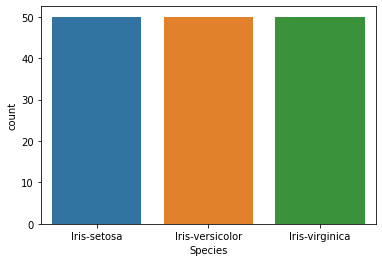

In [5]:
sns.countplot(data['Species'])

As we can see, each of the output classes are balanced, and thus, we do not encounter the problem of imbalanced classes.

In [6]:
data=data.drop('Id',axis=1)

In [7]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# Modeling

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model=DecisionTreeClassifier(random_state=10)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [13]:
np.concatenate((y_test.reshape(-1,1),y_preds.reshape(-1,1)),axis=1)

array([['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setos

In [14]:
print(confusion_matrix(y_test,y_preds))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [15]:
print(accuracy_score(y_test,y_preds))

1.0


# DECISION TREE VISUALIZATION

In [21]:
from sklearn import tree

In [24]:
feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_names=['setosa','versicolor','virginica']

Text(0.5, 1.0, 'Decision Tree Visualization')

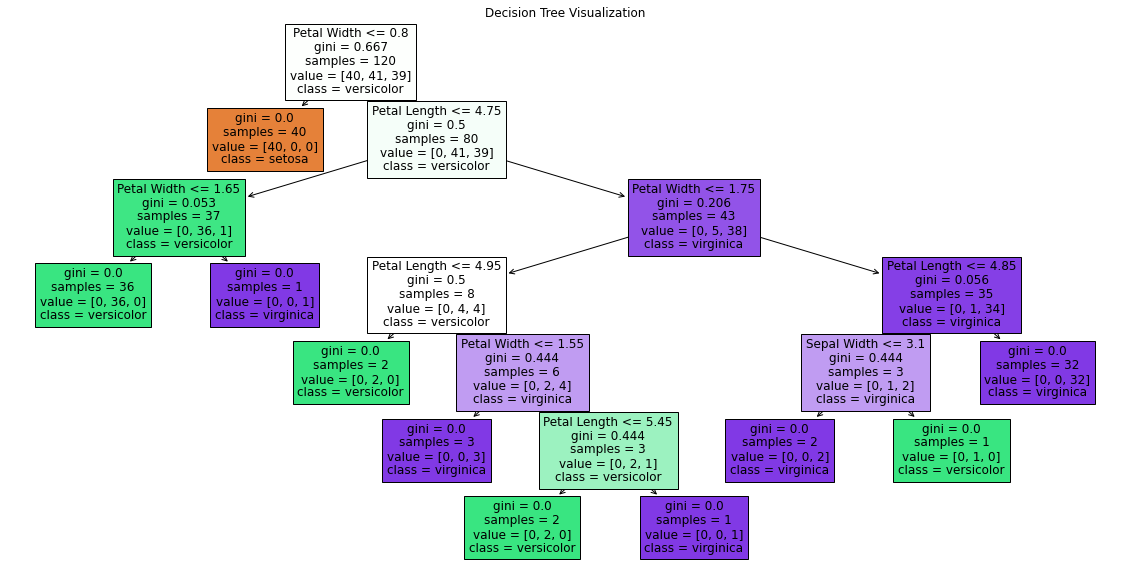

In [28]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
plt.title('Decision Tree Visualization')